# Report 1 - Sorting algorithms.
### Jakub Jagła, Łukasz Borak - Laboratories group 3, Algorithms and Data Structures
*** 

## Descriptions of the algorithms

1. **Selection sort** - works by finding the smallest element from unsorted part of the array and moving it to the beginning of the unsorted part. (ascending order) This is repeated until array is sorted.
Due to its high time complexity - O(n^2) it's inefficient for large datasets, however it can be used for small arrays.

2. **Quicksort** - selects an element as pivot and partitions the array into two sub-arrays around the pivot. One with elements less than the pivot and the other wwith greater than pivot. It is recursively repeated for each sub-array until the list is sorted.
Quicksort is a lot faster than selection sort, especially for large datasets, due to its time complexity O(n log n). It is often used as a default sorting algorithms in programming languages and libraries.

## Code and graphs

### Selection sort

In [2]:
'''
#include <iostream>
#include <time.h>
#include "selectionsort.h"

int selectionSort(int *array, int size)
{
    for (int i = 0;i < size;i++)
    {
        int mindex = i;
        int minval = array[mindex];
        for (int j = i;j < size;j++)
        {
            if(array[j] < minval){
                mindex = j;
                minval = array[j];
            }
        }
        std::swap(array[i],array[mindex]);
    }
    return 0;
}
'''

### Quicksort

In [3]:
'''
#include <iostream>
#include "quicksort.h"

//using namespace std;
int quicksort(int *array, int start, int stop)
{    
    if (start >= stop)
        return 0;

    int pivot = array[stop];
    int j = start;
    for (int i = start; i < stop; i++)
    {
        if (array[i] <= pivot)
        {
            std::swap(array[i], array[j]);
            j += 1;
        }
    }
    std::swap(array[j], array[stop]);
    quicksort(array, start, j - 1);
    quicksort(array, j + 1, stop);
    return 0;
}
'''

### Timing the algorithms

In [ ]:
'''
#include <iostream>
#include <chrono>
#include <thread>
#include <time.h>
#include "quicksort.h"
#include "selectionsort.h"

class Timer
{
private:
	using Clock = std::chrono::steady_clock;
	using Second = std::chrono::duration<double, std::ratio<1> >;

	std::chrono::time_point<Clock> m_beg { Clock::now() };

public:
	void reset()
	{
		m_beg = Clock::now();
	}

	double elapsed() const
	{
		return std::chrono::duration_cast<Second>(Clock::now() - m_beg).count();
	}
};

int main(int argc, char const *argv[])
{
    const int min_tab_size = 1000;
    const int max_tab_size = 500000;
    const int step = 1000;
    std::cout << "Quicksort\n";
    //quicksort
    for (int i = min_tab_size; i <= max_tab_size; i+=step)
    {
        //generate
        srand(time(NULL));
        //int *tab = new int[i];
        int tab[i];
        for (int j = 0;j < i;j++)
        {
            tab[j] = rand()%i;
        }
        Timer t;
        quicksort(tab,0,i-1);
        std::cout << i << " " << t.elapsed() << "\n";
        std::this_thread::sleep_for(std::chrono::milliseconds(100));
    }
    std::cout << "Selection Sort\n";
    //selection sort
    for (int i = min_tab_size; i <= max_tab_size; i+=step)
    {
        //generate
        srand(time(NULL));
        //int *tab = new int[i];
        int tab[i];
        for (int j = 0;j < i;j++)
        {
            tab[j] = rand()%i;
        }
        Timer t;
        selectionSort(tab,i);
        std::cout << i << " " << t.elapsed() << "\n";
    }
    return 0;
}
'''

### Graphs

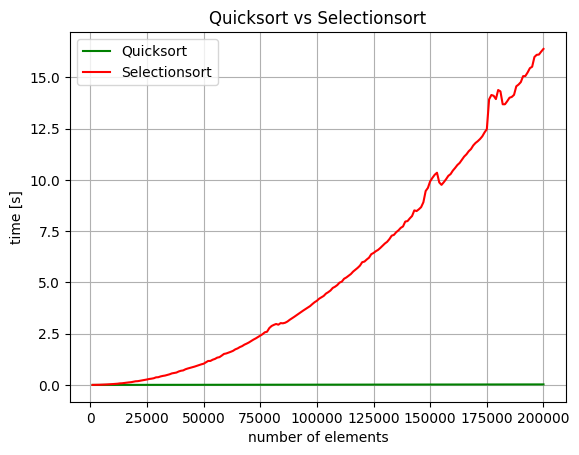

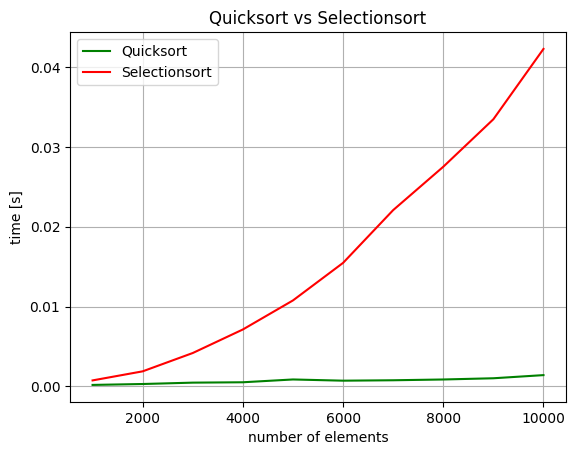

In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Load and rearrange the data
quicksort = np.loadtxt('quicksort2.txt', delimiter=' ')
selectionsort = np.loadtxt('selectionsort2.txt', delimiter=' ')

x = [array[0] for array in quicksort]
y_qcksort = [array[1] for array in quicksort]
y_selectionsort = [array[1] for array in selectionsort]

# Plot
fig, ax = plt.subplots(1, 1)
ax.plot(x, y_qcksort, color='green', label='Quicksort')
ax.plot(x, y_selectionsort, color='red', label='Selectionsort')
plt.title('Quicksort vs Selectionsort')
plt.xlabel('number of elements')
plt.ylabel('time [s]')
plt.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots(1, 1)
ax.plot(x[:10], y_qcksort[:10], color='green', label='Quicksort')
ax.plot(x[:10], y_selectionsort[:10], color='red', label='Selectionsort')
plt.title('Quicksort vs Selectionsort')
plt.xlabel('number of elements')
plt.ylabel('time [s]')
plt.legend()
plt.grid(True)
plt.show()